Analyze bankloan.csv
1. Apply KNN classifier
    - target : default
    - feature : employ, debtinc, credebt, othdebt
2. Using different k (1,3, ..., 101)
3. Apply scaling and validate the model using accuracy 20% testing data and 80% training data
4. Compare accuracies obtained from training data and testing data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw = pd.read_csv('data/bankloan.csv')
df = raw.copy()
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


In [3]:
# explore data
df[['employ','debtinc','creddebt','othdebt']].isna().sum()

employ      0
debtinc     0
creddebt    0
othdebt     0
dtype: int64

In [4]:
# splitting
x = df[['employ','debtinc','creddebt','othdebt']]
y = df['default']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 2020, stratify=y)

In [5]:
# scalling
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [6]:
# KNN with scaller
train = []
test  = []
max = 0
best_k = 0
for i in range(1,100,2):
    knn_scaler = KNeighborsClassifier(n_neighbors=i)
    knn_scaler.fit(x_train_scaled, y_train)
    
    y_pred_train_scaled = knn_scaler.predict(x_train_scaled)
    train.append(accuracy_score(y_train,y_pred_train_scaled))
    
    y_pred_test_scaled = knn_scaler.predict(x_test_scaled)
    test.append(accuracy_score(y_test,y_pred_test_scaled))
    
    if max < accuracy_score(y_test,y_pred_test_scaled):
        max = accuracy_score(y_test,y_pred_test_scaled)
        best_k = i
print("best k {}, accuracies {}".format(best_k,max))

best k 31, accuracies 0.8285714285714286


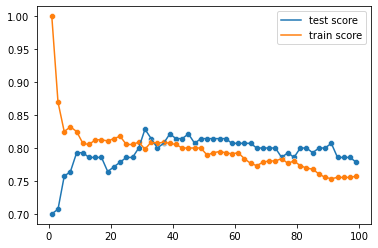

In [7]:
sns.lineplot(x=range(1,100,2),y=test)
sns.scatterplot(x=range(1,100,2),y=test)

sns.lineplot(x=range(1,100,2),y=train)
sns.scatterplot(x=range(1,100,2),y=train)

plt.xlabel= "k"
plt.ylabel ="akurasi"
plt.legend(['test score','train score'])
plt.show()

HIGHLIGHT:
<br>
1. k=1 score train = 100%, score test 70%. Ketika ada baru yg belum ada model. Model hanya mampu meprediksi 7 dari 10 loan
2. semakin tinggi k dari 1 hingga 30 menuju optimal / general

In [8]:
# KNN withou scaled
# a = []
# for i in range(1,102,2):
#     knn = KNeighborsClassifier(n_neighbors=i)
#     knn.fit(x_train, y_train)
#     y_pred_class = knn.predict(x_test)
#     a.append(accuracy_score(y_test,y_pred_class))
# max(a)

## Decision Tree

Analyze data bankloan.csv
1. Apply Decision Tree Classifier
    - Target : Default
    - Features : employ, creddebt, debtinc, othdebt
2. Using different max depth of the tree (1,2,3,...,25): <br> validate the model using accuracies obtained from training data and testing data
3. You may try another hyperparameter such as inimum samples split, minimum samples leaf, etc

In [9]:
# Data frame
import pandas as pd
import numpy as np

# preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# visual
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [10]:
raw = pd.read_csv('data/bankloan.csv')
df = raw.copy()
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


In [11]:
x.isna().sum()

employ      0
debtinc     0
creddebt    0
othdebt     0
dtype: int64

In [12]:
# splitting 20 test 80 train
x = df[['employ','debtinc','creddebt','othdebt']]
y = df['default']

x_train,x_test,y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state = 2020,
    stratify = y
)

In [13]:
# scaling
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [14]:
max=0
best_depth = 0
test = []
train = []
for i in range(1,26):
    tree = DecisionTreeClassifier(
        max_depth=i,
        criterion='entropy'
    )
    tree.fit(x_train, y_train)
    
    y_predict_test_scaled = tree.predict(x_test)
    test.append(accuracy_score(y_test,y_predict_test_scaled))
    
    y_predict_train_scaled = tree.predict(x_train)
    train.append(accuracy_score(y_train,y_predict_train_scaled))
    
    if max < accuracy_score(y_test,y_predict_test_scaled):
        max = accuracy_score(y_test,y_predict_test_scaled)
        best_depth = i
print('best depth {}, accuracies = {}'.format(best_depth,max))

best depth 8, accuracies = 0.7857142857142857


In [15]:
test

[0.7142857142857143,
 0.7142857142857143,
 0.7785714285714286,
 0.7785714285714286,
 0.7785714285714286,
 0.7642857142857142,
 0.7714285714285715,
 0.7857142857142857,
 0.7428571428571429,
 0.7571428571428571,
 0.7285714285714285,
 0.7357142857142858,
 0.7142857142857143,
 0.7,
 0.6857142857142857,
 0.6928571428571428,
 0.7142857142857143,
 0.6857142857142857,
 0.6857142857142857,
 0.7071428571428572,
 0.6928571428571428,
 0.6785714285714286,
 0.6857142857142857,
 0.7071428571428572,
 0.6857142857142857]

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\62812\anacond

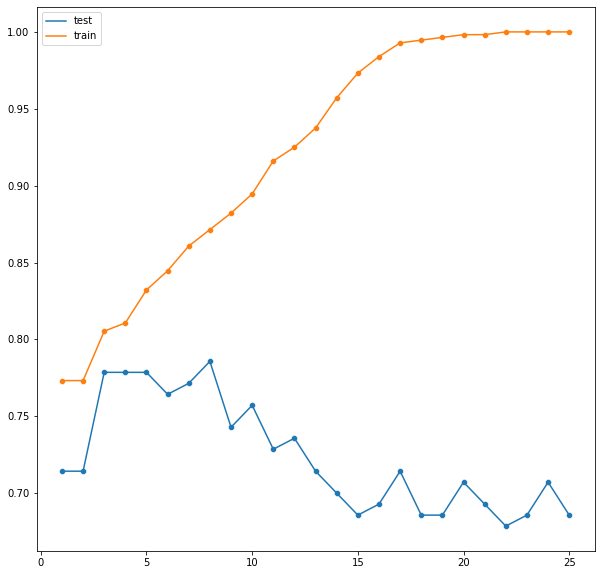

In [16]:
plt.figure(figsize=(10,10))
sns.lineplot(range(1,26),test)
sns.scatterplot(range(1,26),test)
sns.lineplot(range(1,26),train)
sns.scatterplot(range(1,26),train)
plt.legend(['test','train'])
plt.show()

Depth = max kedalaman pohon/banyaknya splitting
1. Jika depth terlalu rendah(1,2), cenderung underfitting
2. Jika terlalu tinggi (lebih dari 8), cenderung overfitting dan untuk akurasi testnya kurang baik.
3. Best depth 8 akurasi test terbaik.
    - Decision Tree cenderung overfitting

## Ridge

Analyze data boston dataset from sklearn
1. Apply Ridge Regression
    - Target : target (house price)
    - Features : CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV
2. Using different alpha (100000,10000,1000,100,10,1,0.1,0.01,0.001) <br> Validate the model using mse in 20% testing data and 80% training data
4. Compare mse obtained from training data and testing data

In [1]:
# dataframe
import pandas as pd
import numpy as np

# data
from sklearn.datasets import load_boston

# preprocess
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [2]:
boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
# pd.DataFrame.from_dict(data=boston)
df = pd.DataFrame(data = boston['data'], columns=boston['feature_names'])
df['y'] = pd.Series(boston['target'])
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Ket :
1. CRIM : tingkat kejahatan
2. ZN : proporsi tempat tinggal / bangunan yang luasnya > 25000 kaki persegi
3. INDUS : proporsi lahan hektar yg termasuk bisini non retail
4. CHAS : apakah pemukiman dekat dengan sungai
5. NOX : konsentrasi Nitrogen Oksida di udara
6. RM : rata2 ruangan dari setiap rumah yang ada dipemukiman
7. AGE : proporsi hunian yang terisi huniannya dibangun sebelum thn 1940
8. DIS : rata2 jarak hunian terhadap 5 pusat perkantoran di BOSTON
9. RAD : tingkat aksesibilitas terhadap jalan raya/jalan TOL
10. TAX : tarif pajak properti
11. PTRATIO : rasio antara siswa dan guru
12. B : mengindikasikan seberapa banyak orang kulit hitam di pemukiman
13. LSTAT : mengindikasikan ada berapa banyak masyarakat kelas bawah
14. MEDV : kisaran harga rumah di pemukiman ($1000) dlm median

In [7]:
# split data
x = df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=1899
)

In [8]:
# scaling
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
# Ridge
hyperparam_alpha = [100000,10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001,0.000001]
test_mse = []
train_mse = []
score = 1000
best_alpha = 0

for i in hyperparam_alpha:
#     training model
    ridge = Ridge(alpha=i)
    ridge.fit(x_train_scaled,y_train)
    
    y_train_pred = ridge.predict(x_train_scaled)
    mse_train = mean_squared_error(y_train,y_train_pred)
    train_mse.append(mse_train)
    
    y_test_pred = ridge.predict(x_test_scaled)
    mse_test = mean_squared_error(y_test,y_test_pred)
    test_mse.append(mse_test)
    
    if score > mse_test:
        score = mse_test
        best_alpha = i
        
print("best alpha {}, accuracies {}".format(best_alpha,score))
test_mse

best alpha 1, accuracies 27.686878880361682


[83.85880100865704,
 82.9692771903585,
 75.67798038205832,
 51.42824466293076,
 28.878246098825723,
 27.686878880361682,
 28.627257443265673,
 28.761537265595962,
 28.775541748326827,
 28.7769482368374,
 28.777088946382122,
 28.777103017943812]

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


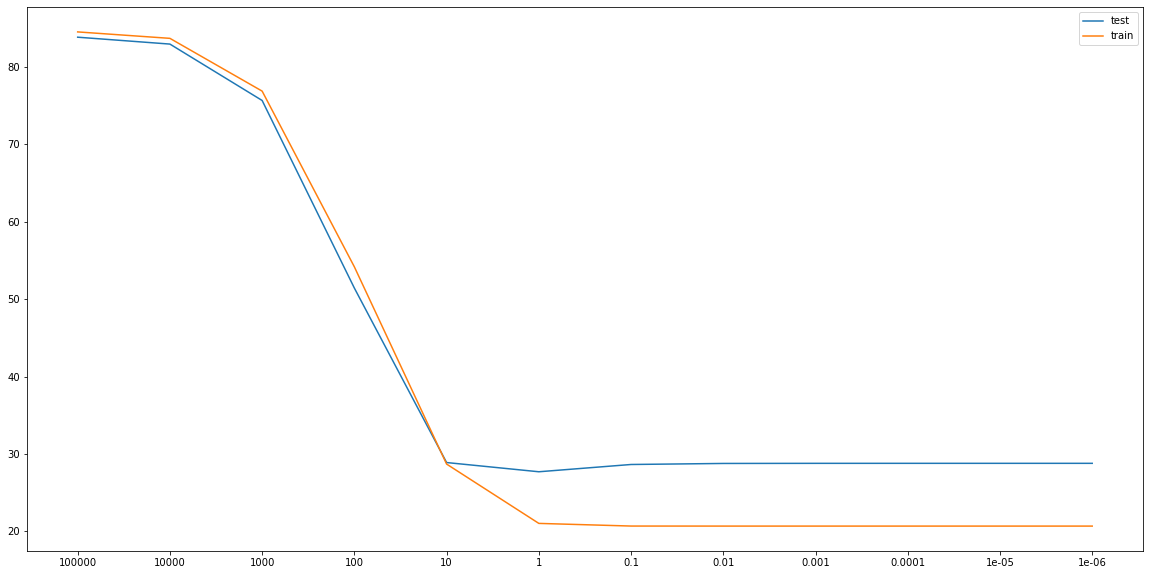

In [11]:
length = range (len(hyperparam_alpha))

plt.figure(figsize=(20,10))
sns.lineplot(length, test_mse)
sns.lineplot(length, train_mse)
plt.legend(['test','train'])
plt.xticks(length, hyperparam_alpha)
plt.show()

In [12]:
pd.DataFrame(
    {    
        'alpha':hyperparam_alpha,
        'score train': train_mse,
        'score test':test_mse
    })

,alpha,score train,score test
0,100000.000000,84.542598,83.858801
1,10000.000000,83.709846,82.969277
2,1000.000000,76.889003,75.677980
3,100.000000,54.172112,51.428245
4,10.000000,28.680369,28.878246
5,1.000000,21.012610,27.686879
6,0.100000,20.669433,28.627257
7,0.010000,20.664355,28.761537
8,0.001000,20.664301,28.775542
9,0.000100,20.664301,28.776948


## Lasso

Analyze data boston dataset from sklearn
1. Apply Lasso regression
    - Target : target (house price)
    - Features : CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV
2. Using different alpha (...,1000,100,10,1,0.1,0.01,..) <br> validate the model using mse in 20% testing data and 80% training data
3. Compare mse obtained from training data and testing data

In [14]:
# Ridge
hyperparam_alpha = [100000,10000,1000,100,10,1,0.1,0.01,0.001,0.0001,0.00001,0.000001]
test_mse = []
train_mse = []
score = 1000
best_alpha = 0

for i in hyperparam_alpha:
#     training model
    lasso = Lasso(alpha=i)
    lasso.fit(x_train_scaled,y_train)
    
    y_train_pred = lasso.predict(x_train_scaled)
    mse_train = mean_squared_error(y_train,y_train_pred)
    train_mse.append(mse_train)
    
    y_test_pred = lasso.predict(x_test_scaled)
    mse_test = mean_squared_error(y_test,y_test_pred)
    test_mse.append(mse_test)
    
    if score > mse_test:
        score = mse_test
        best_alpha = i
        
print("best alpha {}, accuracies {}".format(best_alpha,score))
test_mse

best alpha 0.001, accuracies 28.770786557661072


[83.95983467475314,
 83.95983467475314,
 83.95983467475314,
 83.95983467475314,
 83.95983467475314,
 63.08129127931523,
 31.6606293569828,
 28.859161383602366,
 28.770786557661072,
 28.776327959979042,
 28.7770254100128,
 28.777096641025146]

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


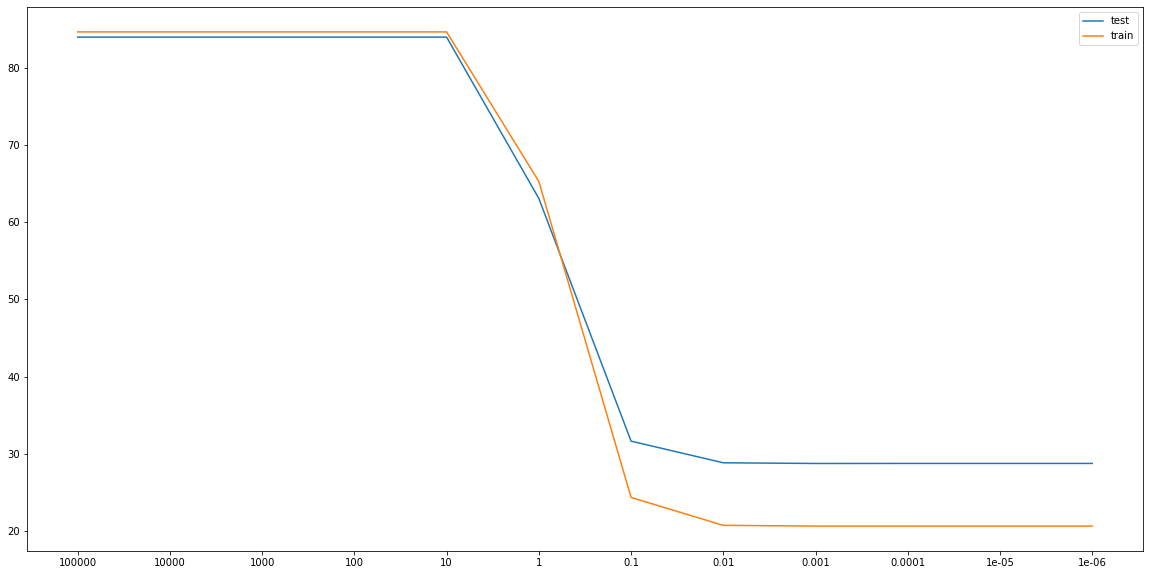

In [15]:
length = range (len(hyperparam_alpha))

plt.figure(figsize=(20,10))
sns.lineplot(length, test_mse)
sns.lineplot(length, train_mse)
plt.legend(['test','train'])
plt.xticks(length, hyperparam_alpha)
plt.show()

alpha besar > 0.001 model underfitting krn test maupun train sama2 buruk
alpha optimal = 0.001